In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']].values
Y = data[['Chance of Admit ']].values

In [5]:
X = X/X.max(axis = 0)

In [6]:
print(X)

[[ 0.99117647  0.98333333  0.8        ...,  0.9         0.97278226  1.        ]
 [ 0.95294118  0.89166667  0.8        ...,  0.9         0.89415323  1.        ]
 [ 0.92941176  0.86666667  0.6        ...,  0.7         0.80645161  1.        ]
 ..., 
 [ 0.97058824  0.96666667  0.8        ...,  0.9         0.95262097  1.        ]
 [ 0.91764706  0.85833333  0.6        ...,  0.8         0.88508065  0.        ]
 [ 0.97941176  0.975       0.8        ...,  0.8         0.97379032  1.        ]]


In [7]:
inputlayer_neurons = X.shape[1]
hiddenlayer_neurons = 3
output_neurons = 1

In [8]:
wh = np.random.uniform(size = (inputlayer_neurons, hiddenlayer_neurons))
wo = np.random.uniform(size = (hiddenlayer_neurons, output_neurons))
bh = np.random.uniform(size = (1, hiddenlayer_neurons))
bo = np.random.uniform(size = (1, output_neurons))

In [9]:
print(wh)

[[ 0.32698121  0.59106497  0.55463528]
 [ 0.32686267  0.2119309   0.76852051]
 [ 0.58150259  0.98121218  0.98922403]
 [ 0.11949203  0.95793378  0.47523077]
 [ 0.65045621  0.32314317  0.02375417]
 [ 0.99085866  0.27475834  0.12484638]
 [ 0.62801501  0.85214607  0.03422877]]


In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return x * (1-x)

69.9950088226


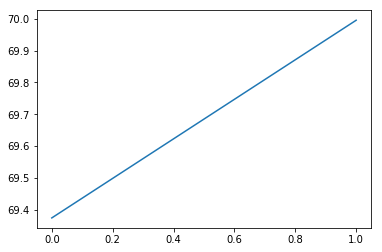

In [11]:
epochs = 2
learning_rate = 0.001
cost = []
for i in range(epochs):
    
    hiddenlayer_input = np.dot(X,wh) + bh
    hiddenlayer_activation = sigmoid(hiddenlayer_input)
    outputlayer_input = np.dot(hiddenlayer_activation, wo) + bo
    output = sigmoid(outputlayer_input)
    
    E = output - Y
    cost.append(E.sum())
    grad_output = sigmoid_p(output)
    d_output = E * grad_output
    Errorhidden_layer = np.dot(d_output,wo.T)
    grad_hidden = sigmoid_p(hiddenlayer_activation)
    d_hidden = Errorhidden_layer * grad_hidden
    wo += np.dot(hiddenlayer_activation.T, d_output) * learning_rate
#     bo += grad_output*learning_rate
    wh += np.dot(X.T, d_hidden) * learning_rate
#     bh += grad_hidden * learning_rate

fig = plt.plot(cost)
print(E.sum())    
    
    
    
    